# Problem 1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
traindata = pd.read_csv('train.csv')
traindata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
houseNumData = pd.DataFrame(traindata[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']])

In [4]:
houseNumData.describe()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1515.463699,1057.429452,472.980137,180921.195890
std,9981.264932,525.480383,438.705324,213.804841,79442.502883
min,1300.000000,334.000000,0.000000,0.000000,34900.000000
25%,7553.500000,1129.500000,795.750000,334.500000,129975.000000
50%,9478.500000,1464.000000,991.500000,480.000000,163000.000000
75%,11601.500000,1776.750000,1298.250000,576.000000,214000.000000
max,215245.000000,5642.000000,6110.000000,1418.000000,755000.000000


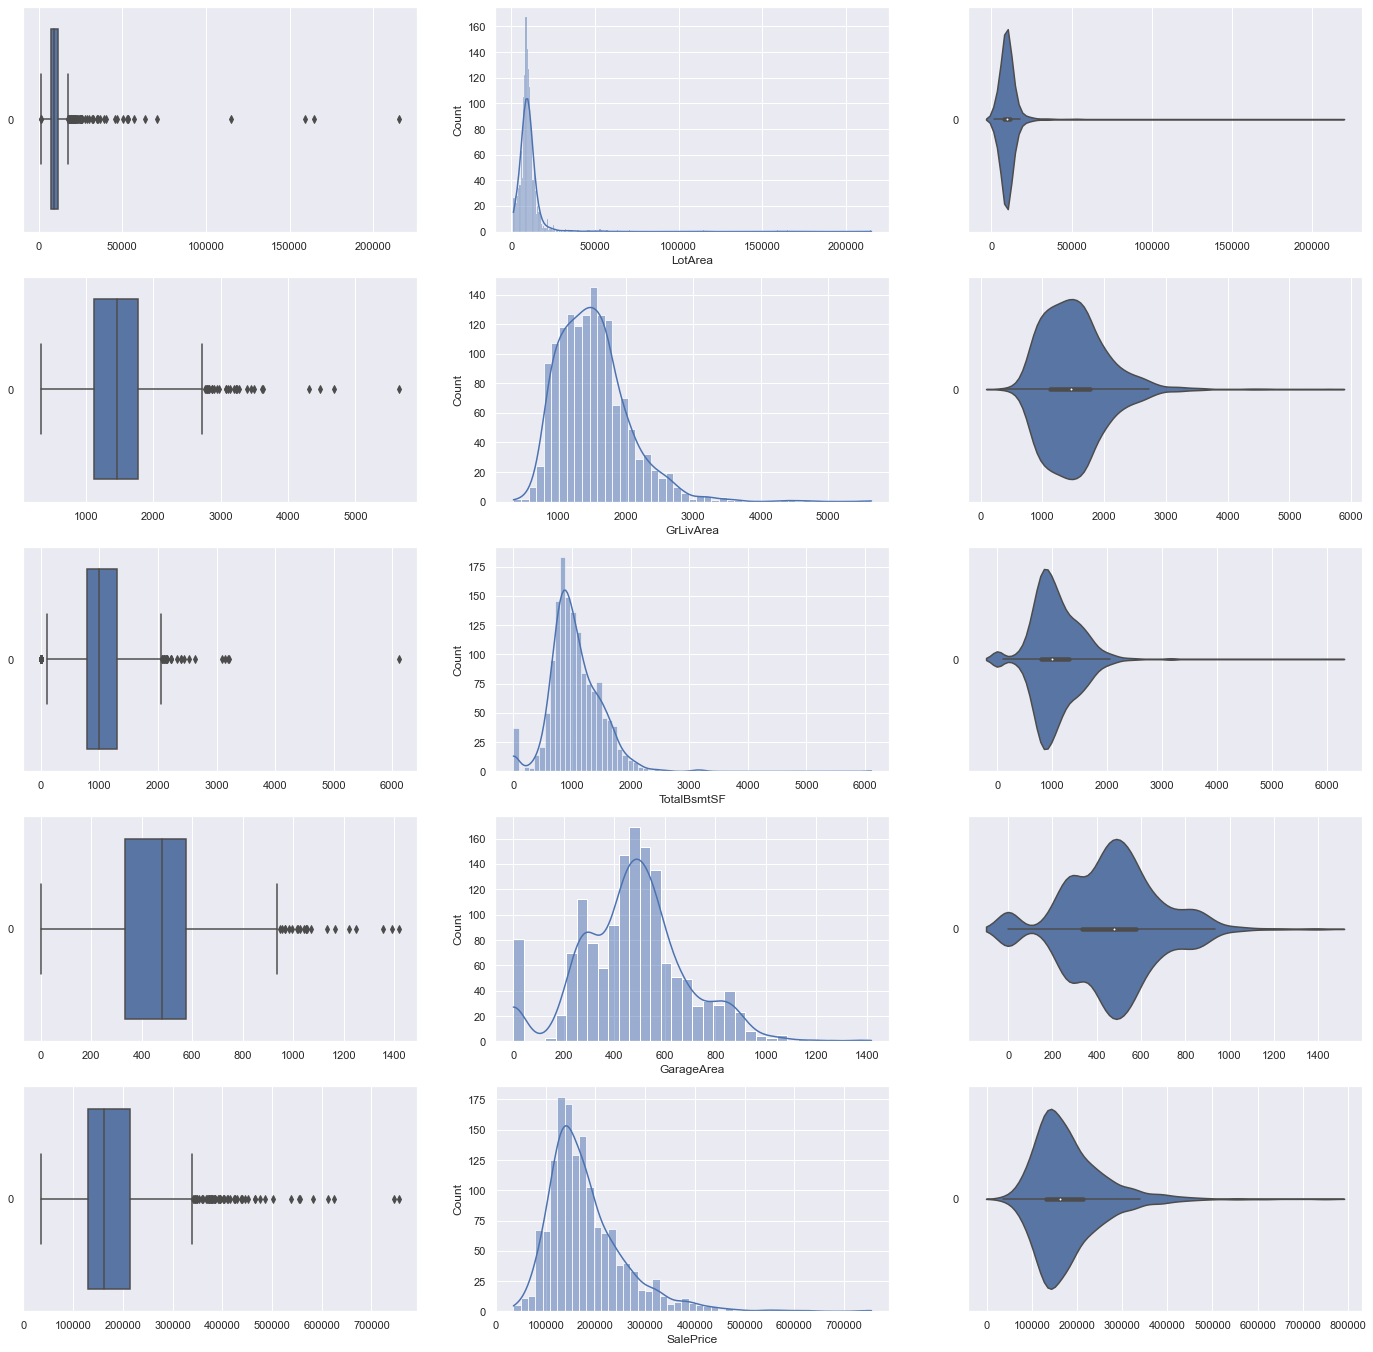

In [5]:
# Draw the distributions of all variables
f, axes = plt.subplots(5, 3, figsize=(24, 24))

count = 0
for var in houseNumData:
    sb.boxplot(data = houseNumData[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = houseNumData[var], kde = True, ax = axes[count,1])
    sb.violinplot(data = houseNumData[var], orient = "h", ax = axes[count,2])
    count += 1

In [6]:
houseNumData.skew()

LotArea        12.207688
GrLivArea       1.366560
TotalBsmtSF     1.524255
GarageArea      0.179981
SalePrice       1.882876
dtype: float64

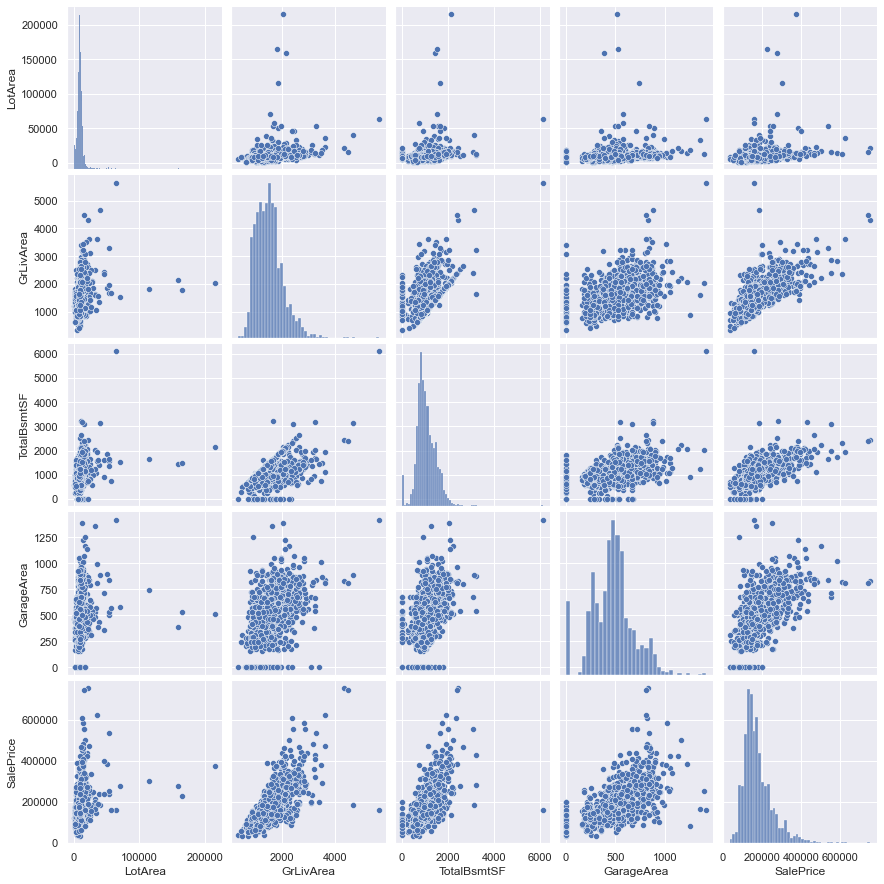

In [7]:
sb.pairplot(data=houseNumData)

<AxesSubplot:>

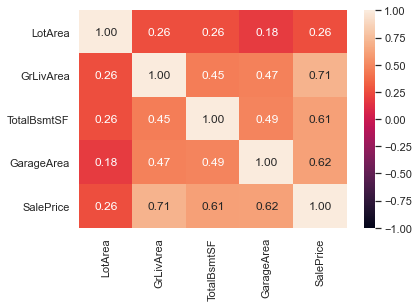

In [8]:
sb.heatmap(houseNumData.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [9]:
houseNumData.corr()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
LotArea,1.000000,0.263116,0.260833,0.180403,0.263843
GrLivArea,0.263116,1.000000,0.454868,0.468997,0.708624
TotalBsmtSF,0.260833,0.454868,1.000000,0.486665,0.613581
GarageArea,0.180403,0.468997,0.486665,1.000000,0.623431
SalePrice,0.263843,0.708624,0.613581,0.623431,1.000000


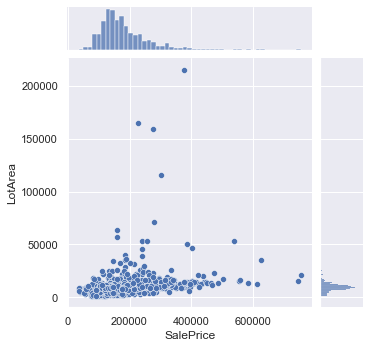

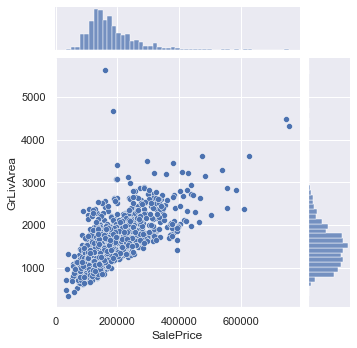

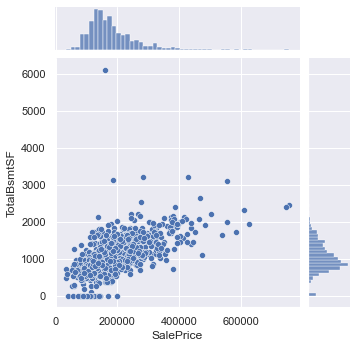

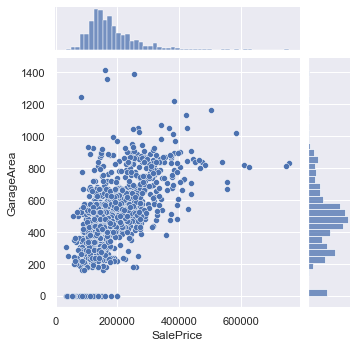

In [10]:
sb.jointplot(data = houseNumData, x = "SalePrice", y = "LotArea", height = 5)
sb.jointplot(data = houseNumData, x = "SalePrice", y = "GrLivArea", height = 5)
sb.jointplot(data = houseNumData, x = "SalePrice", y = "TotalBsmtSF", height = 5)
sb.jointplot(data = houseNumData, x = "SalePrice", y = "GarageArea", height = 5)

# Problem 2

In [11]:
houseCatData = pd.DataFrame(traindata[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']])
houseCatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1460 non-null   int64 
 1   Neighborhood  1460 non-null   object
 2   BldgType      1460 non-null   object
 3   OverallQual   1460 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 45.8+ KB


In [12]:
houseCatData.describe()

,MSSubClass,OverallQual
count,1460.000000,1460.000000
mean,56.897260,6.099315
std,42.300571,1.382997
min,20.000000,1.000000
25%,20.000000,5.000000
50%,50.000000,6.000000
75%,70.000000,7.000000
max,190.000000,10.000000


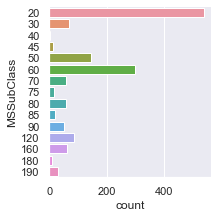

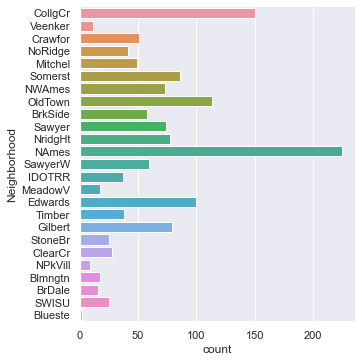

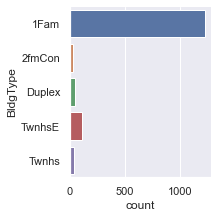

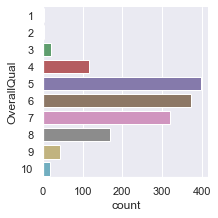

In [13]:
sb.catplot(y = "MSSubClass", data = houseCatData, kind = "count", height = 3)
sb.catplot(y = "Neighborhood", data = houseCatData, kind = "count", height = 5)
sb.catplot(y = "BldgType", data = houseCatData, kind = "count", height = 3)
sb.catplot(y = "OverallQual", data = houseCatData, kind = "count", height = 3)

<AxesSubplot:xlabel='BldgType', ylabel='OverallQual'>

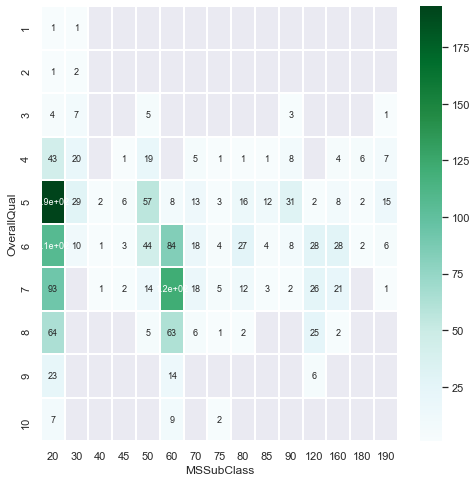

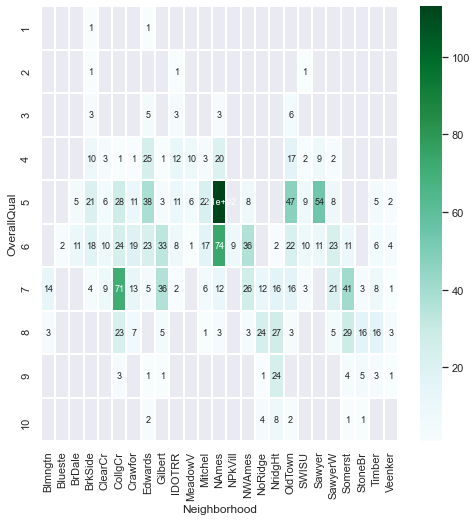

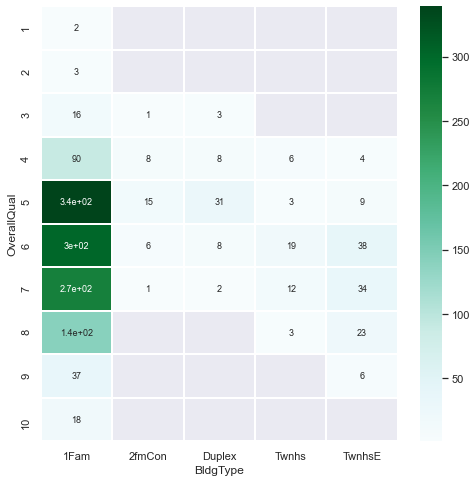

In [14]:
f = plt.figure(figsize=(8, 8))
sb.heatmap(houseCatData.groupby(['OverallQual', 'MSSubClass']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 9}, cmap = "BuGn")
f = plt.figure(figsize=(8, 8))
sb.heatmap(houseCatData.groupby(['OverallQual', 'Neighborhood']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 9}, cmap = "BuGn")
f = plt.figure(figsize=(8, 8))
sb.heatmap(houseCatData.groupby(['OverallQual', 'BldgType']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 9}, cmap = "BuGn")

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

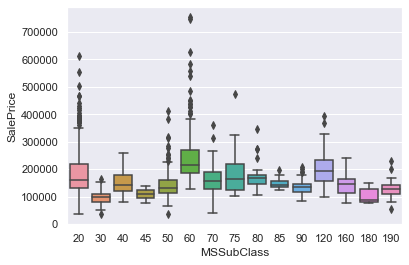

In [26]:
sb.boxplot(x=houseCatData.columns[0], y='SalePrice', data=traindata)

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

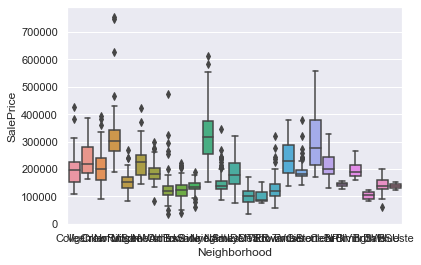

In [28]:
sb.boxplot(x=houseCatData.columns[1], y='SalePrice', data=traindata)

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

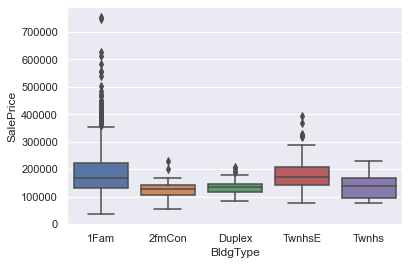

In [29]:
sb.boxplot(x=houseCatData.columns[2], y='SalePrice', data=traindata)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

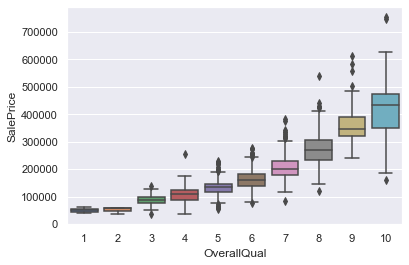

In [30]:
sb.boxplot(x=houseCatData.columns[3], y='SalePrice', data=traindata)